**Installing ronda and rdkit**

In [1]:
!wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
!chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
!bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f  -p /usr/local
!conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2023-10-06 12:30:28--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   229MB/s    in 0.4s    

2023-10-06 12:30:28 (229 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: \ | / - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-h

In [2]:
import pandas as pd

In [15]:
from google.colab import files
uploaded = files.upload()

Saving acetylcholinesterase_03_bioactivity_data_curated.csv to acetylcholinesterase_03_bioactivity_data_curated.csv


In [16]:
df = pd.read_csv('acetylcholinesterase_03_bioactivity_data_curated.csv')

**Calculate the Lipinski Descriptor**

The rule describes molecular properties important for a drug's pharmacokinetics in the human body, including their absorption, distribution, metabolism, and excretion ("ADME"). However, the rule does not predict if a compound is pharmacologically active.
The Lipinski rule states that;
Molecular weight < 500
Octanol-water partition coefficient (LOGP) < 5
Hydrogen bond donors < 5
Hydrogen bond acceptors < 10

**Import Libraries**

In [17]:
!pip install rdkit
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

**Calculate Descriptors**

In [18]:
def lipinski(smiles, verbose=False):

  moldata = []
  for elem in smiles:
    mol = Chem.MolFromSmiles(elem)
    moldata.append(mol)

  baseData=np.arange(1,1)
  i=0
  for mol in moldata:

    desc_MolWt = Descriptors.MolWt(mol)
    desc_MolLogP = Descriptors.MolLogP(mol)
    desc_NumHDonors = Lipinski.NumHDonors(mol)
    desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

    row = np.array([desc_MolWt,
                    desc_MolLogP,
                    desc_NumHDonors,
                    desc_NumHAcceptors])
    if(i==0):
      baseData=row
    else:
      baseData=np.vstack([baseData, row])
      i=i+1
  columnNames = ["MW", "LogP", "NumHDonors", "NumHAcceptors"]
  descriptors = pd.DataFrame(data=baseData, columns = columnNames)

  return descriptors

In [20]:

def lipinski(smiles_list, verbose=False):
    descriptors_data = []

    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        if mol is not None:
            desc_MolWt = Descriptors.MolWt(mol)
            desc_MolLogP = Descriptors.MolLogP(mol)
            desc_NumHDonors = Lipinski.NumHDonors(mol)
            desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

            descriptors_data.append([desc_MolWt, desc_MolLogP, desc_NumHDonors, desc_NumHAcceptors])

    column_names = ["MW", "LogP", "NumHDonors", "NumHAcceptors"]
    descriptors = pd.DataFrame(data=descriptors_data, columns=column_names)

    return descriptors

In [21]:
df_lipinski = lipinski(df.canonical_smiles)

**Combine Dataframe**

MW- Molecular Weight

LogP- Solubility

NumHDonors- Relative bond of donors

NumHAcceptors- Relative bond of acceptors

In [22]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,312.325,2.8032,0,6
1,376.913,4.5546,0,5
2,426.851,5.3574,0,5
3,404.845,4.7069,0,5
4,346.334,3.0953,0,6
...,...,...,...,...
6152,390.461,2.8334,2,5
6153,352.478,5.0610,1,3
6154,287.246,2.1994,1,4
6155,311.337,3.1837,1,4


In [23]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.000,active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.000,active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.000,inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.000,active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.000,active
...,...,...,...,...
6152,CHEMBL5219841,COc1cccc2c1CCCC2NS(=O)(=O)NC(=O)OCc1ccccc1,0.209,active
6153,CHEMBL5219046,CC[C@@]1(c2cccc(OC(=O)Nc3ccccc3)c2)CCCCN(C)C1,274.000,active
6154,CHEMBL5219594,O=c1[nH]c2ccc(OCc3ccc(F)cc3)cc2c(=O)o1,76200.000,inactive
6155,CHEMBL5219958,CC(C)c1ccc(COc2ccc3[nH]c(=O)oc(=O)c3c2)cc1,55000.000,inactive


In [24]:
df_combined = pd.concat([df, df_lipinski], axis = 1)

In [25]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.000,active,312.325,2.8032,0,6
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.000,active,376.913,4.5546,0,5
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.000,inactive,426.851,5.3574,0,5
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.000,active,404.845,4.7069,0,5
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.000,active,346.334,3.0953,0,6
...,...,...,...,...,...,...,...,...
6152,CHEMBL5219841,COc1cccc2c1CCCC2NS(=O)(=O)NC(=O)OCc1ccccc1,0.209,active,390.461,2.8334,2,5
6153,CHEMBL5219046,CC[C@@]1(c2cccc(OC(=O)Nc3ccccc3)c2)CCCCN(C)C1,274.000,active,352.478,5.0610,1,3
6154,CHEMBL5219594,O=c1[nH]c2ccc(OCc3ccc(F)cc3)cc2c(=O)o1,76200.000,inactive,287.246,2.1994,1,4
6155,CHEMBL5219958,CC(C)c1ccc(COc2ccc3[nH]c(=O)oc(=O)c3c2)cc1,55000.000,inactive,311.337,3.1837,1,4


**Convert IC50 to pIC50**

To all **IC50** data to a more uniformly distributed, **pIC50** will be converted to a negative logarithimic scale which is essentially **-log10(IC50)**

This custom function pIC50() will accept a DataFrame as input and will

*   Take the IC50 values from the standard_value column and converts it from nM to M by multiplying the value by 10-9
*   Take the molar value and apply -log10
*   Delete the standard_value column and create a new pIC50column






In [26]:
def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i * (10**-9)  # Convert nM to M
        pIC50.append(-np.log10(molar))

    # Assign the 'pIC50' column outside of the loop
    input['pIC50'] = pIC50

    # Remove the 'standard_value_norm' column
    x = input.drop('standard_value_norm', axis=1)

    return x

In [27]:
df_combined.standard_value.describe()

count    6.157000e+03
mean     1.064665e+05
std      9.218081e+05
min      0.000000e+00
25%      1.480000e+02
50%      2.300000e+03
75%      1.700000e+04
max      4.960000e+07
Name: standard_value, dtype: float64

In [28]:
-np.log10((10**-9)*100000000)

1.0

In [29]:
-np.log10((10**-9)*10000000000)

-1.0

In [30]:
def norm_value(input):
  norm = []
  for i in input['standard_value']:
    if i > 1000000000:
      i = 100000000
    norm.append(i)

  input['standard_value_norm'] = norm
  x = input.drop('standard_value', 1)
  return x

**First apply the norm_value() function so that the values in the standard_value column is normalized**

In [31]:
df_norm = norm_value(df_combined)
df_norm

<ipython-input-30-a980a8f88e8f>:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value', 1)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0,6,750.000
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.5546,0,5,100.000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.3574,0,5,50000.000
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.7069,0,5,300.000
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.0953,0,6,800.000
...,...,...,...,...,...,...,...,...
6152,CHEMBL5219841,COc1cccc2c1CCCC2NS(=O)(=O)NC(=O)OCc1ccccc1,active,390.461,2.8334,2,5,0.209
6153,CHEMBL5219046,CC[C@@]1(c2cccc(OC(=O)Nc3ccccc3)c2)CCCCN(C)C1,active,352.478,5.0610,1,3,274.000
6154,CHEMBL5219594,O=c1[nH]c2ccc(OCc3ccc(F)cc3)cc2c(=O)o1,inactive,287.246,2.1994,1,4,76200.000
6155,CHEMBL5219958,CC(C)c1ccc(COc2ccc3[nH]c(=O)oc(=O)c3c2)cc1,inactive,311.337,3.1837,1,4,55000.000


In [32]:
df_norm.standard_value_norm.describe()

count    6.157000e+03
mean     1.064665e+05
std      9.218081e+05
min      0.000000e+00
25%      1.480000e+02
50%      2.300000e+03
75%      1.700000e+04
max      4.960000e+07
Name: standard_value_norm, dtype: float64

In [33]:
df_final = pIC50(df_norm)
df_final

<ipython-input-26-13414013923f>:6: RuntimeWarning: divide by zero encountered in log10
  pIC50.append(-np.log10(molar))


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0,6,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.5546,0,5,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.3574,0,5,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.7069,0,5,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.0953,0,6,6.096910
...,...,...,...,...,...,...,...,...
6152,CHEMBL5219841,COc1cccc2c1CCCC2NS(=O)(=O)NC(=O)OCc1ccccc1,active,390.461,2.8334,2,5,9.679854
6153,CHEMBL5219046,CC[C@@]1(c2cccc(OC(=O)Nc3ccccc3)c2)CCCCN(C)C1,active,352.478,5.0610,1,3,6.562249
6154,CHEMBL5219594,O=c1[nH]c2ccc(OCc3ccc(F)cc3)cc2c(=O)o1,inactive,287.246,2.1994,1,4,4.118045
6155,CHEMBL5219958,CC(C)c1ccc(COc2ccc3[nH]c(=O)oc(=O)c3c2)cc1,inactive,311.337,3.1837,1,4,4.259637


In [34]:
df_final.pIC50.describe()

count    6157.000000
mean             inf
std              NaN
min         1.304518
25%         4.769551
50%         5.638272
75%         6.829738
max              inf
Name: pIC50, dtype: float64

In [45]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.80320,0,6,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.55460,0,5,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.35740,0,5,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.70690,0,5,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.09530,0,6,6.096910
...,...,...,...,...,...,...,...,...
6151,CHEMBL5219483,Cc1c(Cl)c(=O)oc2cc(OCCCCSC(=S)N3C(C)CCCC3C)ccc12,active,454.057,6.19482,0,5,6.943095
6152,CHEMBL5219841,COc1cccc2c1CCCC2NS(=O)(=O)NC(=O)OCc1ccccc1,active,390.461,2.83340,2,5,9.679854
6153,CHEMBL5219046,CC[C@@]1(c2cccc(OC(=O)Nc3ccccc3)c2)CCCCN(C)C1,active,352.478,5.06100,1,3,6.562249
6154,CHEMBL5219594,O=c1[nH]c2ccc(OCc3ccc(F)cc3)cc2c(=O)o1,inactive,287.246,2.19940,1,4,4.118045


**Exploratory Data Analysis (chemical Space Analysis) via Lipinski descriptors**

**Import Library**

In [46]:
import seaborn as sns
sns.set(style = 'ticks')
import matplotlib.pyplot as plt

**Frequency plot of the 2 bioactivity classes**

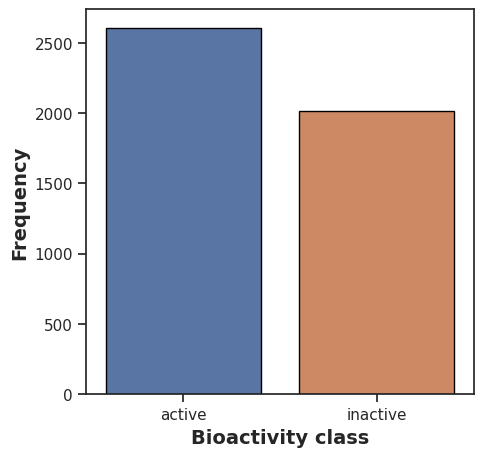

In [47]:
plt.figure(figsize =(5,5))
sns.countplot(x='class', data = df_2class, edgecolor = 'black')
plt.xlabel('Bioactivity class', fontsize=14, fontweight ='bold')
plt.ylabel('Frequency', fontsize =14, fontweight = 'bold')
plt.savefig('plot_acetylcholinesterase_03_bioactivity_data_curated.pdf')

**Scatter Plot of MW versus LogP **

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:1355: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:1355: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)


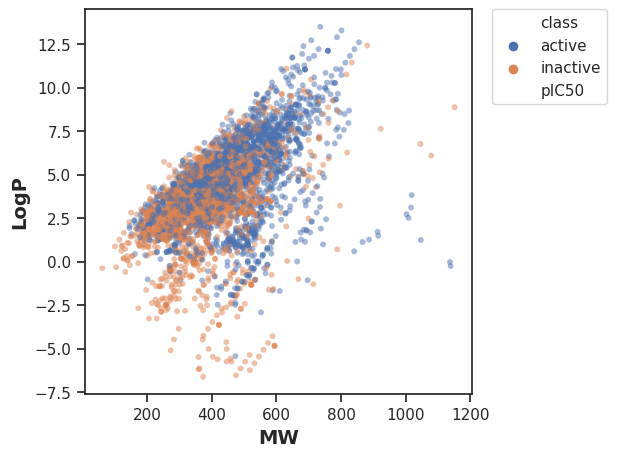

In [49]:
plt.figure(figsize = (5, 5))
sns.scatterplot(x= 'MW', y = 'LogP', data = df_2class, hue = 'class', size = 'pIC50', edgecolor = 'black', alpha = 0.5)
plt.xlabel('MW', fontsize = 14, fontweight = 'bold')
plt.ylabel('LogP', fontsize = 14, fontweight = 'bold')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0)
plt.show()

**Box Plots**

**pIC50 Value**

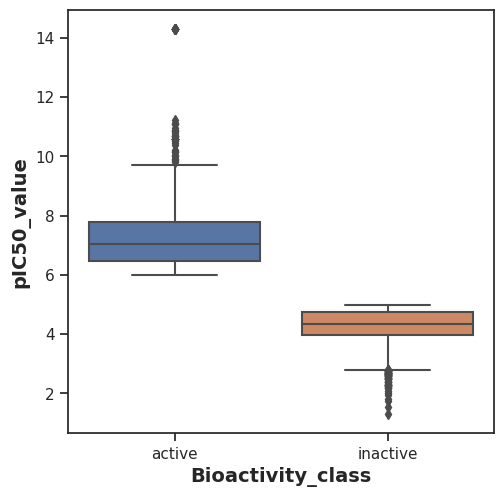

In [50]:
plt.figure(figsize = (5.5, 5.5))
sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)
plt.xlabel('Bioactivity_class', fontsize = 14, fontweight = 'bold')
plt.ylabel('pIC50_value', fontsize= 14, fontweight= 'bold')
plt.savefig('plot_pIC50.pdf')

**Statistical analysis using Mann-Whitney test**

In [53]:
from scipy.stats import mannwhitneyu

def mannwhitney(descriptor, df_2class, alpha=0.05, verbose=False):
    # Select the relevant columns from df_2class
    selection = [descriptor, 'class']
    df = df_2class[selection]

    # Split the data into 'active' and 'inactive' groups
    active = df[df['class'] == 'active'][descriptor]
    inactive = df[df['class'] == 'inactive'][descriptor]

    # Perform the Mann-Whitney U test
    stat, p = mannwhitneyu(active, inactive, alternative='two-sided')

    # Interpret the results based on the p-value
    if p < alpha:
        interpretation = 'Reject the null hypothesis: Significant difference between groups.'
    else:
        interpretation = 'Fail to reject the null hypothesis: No significant difference between groups.'

    # Create a DataFrame to store the results
    results = pd.DataFrame({
        'Descriptor': [descriptor],
        'Statistics': [stat],
        'p-value': [p],
        'alpha': [alpha],
        'Interpretation': [interpretation]
    })

    # Save the results to a CSV file
    filename = 'mannwhitneyu_' + descriptor + '.csv'
    results.to_csv(filename, index=False)

    return results


In [54]:
results = mannwhitney('pIC50', df_2class)
results

,Descriptor,Statistics,p-value,alpha,Interpretation
0,pIC50,5247296.0,0.0,0.05,Reject the null hypothesis: Significant differ...


**MW**

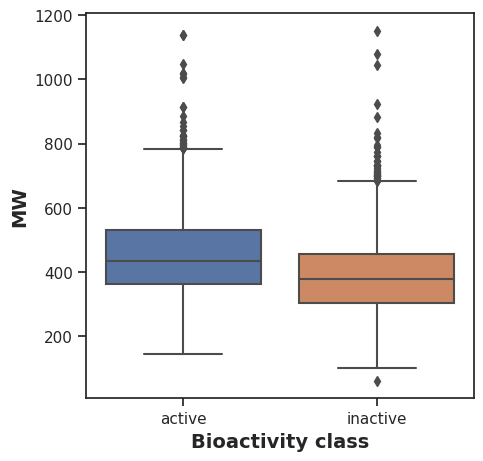

In [58]:
plt.figure(figsize = (5,5))
sns.boxplot(x = 'class', y ='MW', data = df_2class)
plt.xlabel('Bioactivity class', fontsize =14, fontweight = 'bold')
plt.ylabel('MW', fontsize = 14, fontweight = 'bold')
plt.savefig('plot_mw.pdf')

In [57]:
results = mannwhitney('MW', df_2class)
results

,Descriptor,Statistics,p-value,alpha,Interpretation
0,MW,3380973.5,1.093216e-63,0.05,Reject the null hypothesis: Significant differ...


**LogP**

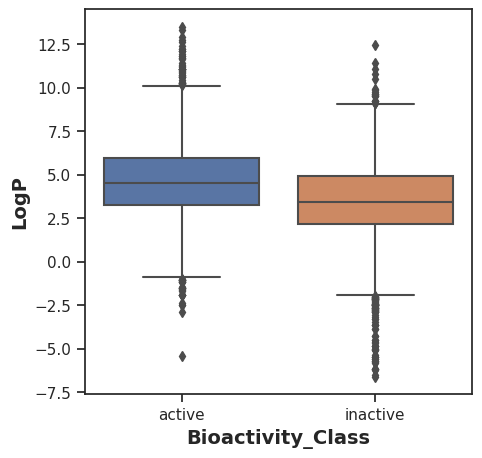

In [59]:
plt.figure(figsize = (5, 5))
sns.boxplot(x = 'class', y = 'LogP', data = df_2class)
plt.xlabel('Bioactivity_Class', fontsize = 14, fontweight = 'bold')
plt.ylabel('LogP', fontsize = 14, fontweight = 'bold')
plt.savefig('plot_logp.pdf')

**Statistical analysis for Mannwhitney test**

In [60]:
results = mannwhitney('LogP', df_2class)
results

,Descriptor,Statistics,p-value,alpha,Interpretation
0,LogP,3379297.0,2.052334e-63,0.05,Reject the null hypothesis: Significant differ...


**NumHDonor**

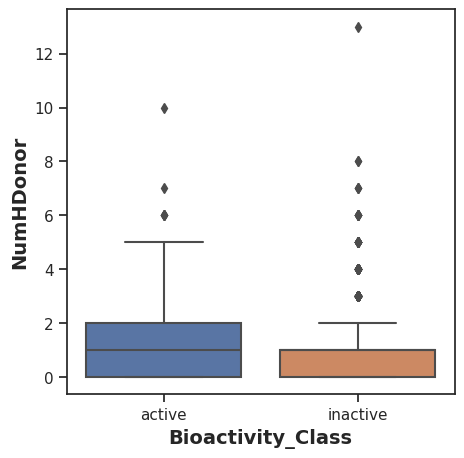

In [61]:
plt.figure(figsize= (5,5))
sns.boxplot(x ='class', y = 'NumHDonors', data = df_2class)
plt.xlabel('Bioactivity_Class', fontsize = 14, fontweight = 'bold')
plt.ylabel('NumHDonor', fontsize = 14, fontweight ='bold')
plt.savefig('plt_NumHDonor.pdf')

**Statistical analysis for Mannwhitney test**

In [62]:
results = mannwhitney('NumHDonors', df_2class)
results

,Descriptor,Statistics,p-value,alpha,Interpretation
0,NumHDonors,3013369.5,9.921624e-20,0.05,Reject the null hypothesis: Significant differ...


**NumHAcceptors**

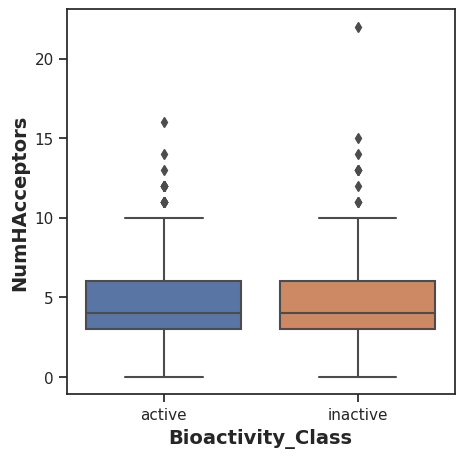

In [63]:
plt.figure(figsize = (5, 5))
sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)
plt.xlabel('Bioactivity_Class', fontsize = 14, fontweight = 'bold')
plt.ylabel('NumHAcceptors', fontsize = 14, fontweight = 'bold')
plt.savefig('plt.NumHAcceptors.pdf')

In [64]:
results = mannwhitney('NumHAcceptors', df_2class)
results

,Descriptor,Statistics,p-value,alpha,Interpretation
0,NumHAcceptors,2835165.5,0.000002,0.05,Reject the null hypothesis: Significant differ...


### **Interpretation of Statistical Results**

**Box Plots**                                                                         

**pIC50 values**

pIC50 values, the actives and inactives displayed statistical difference, which is expected since the threshold values (IC50 < 1000nM = Active, IC50 > 1000nM = Inactive as depicted in; pIC50 > 6 = Active and pIC50 < 5 = Inactive).

**Lipinski's Discriptors**                                                        
of MW, LogP, NumHDnors and NumHAcceptors, only LogP exhibited no significant difference between the active and inactive, while the other three shows statistical significance between the active and inactive.

In [65]:
#!zip -r results.zip . -i "*.csv" "*.pdf"

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New Section

In [67]:
df_final.to_csv('bioactivity_class_pc150.csv', index=False)


In [68]:
! ls -l

total 84500
-rw-r--r-- 1 root root   508567 Oct  6 12:34  acetylcholinesterase_03_bioactivity_data_curated.csv
-rw-r--r-- 1 root root   808342 Oct  6 13:14  bioactivity_class_pc150.csv
-rw-r--r-- 1 root root    10357 Oct  6 12:33 'bioactivity_preprocessed_data (1).csv'
drwx------ 5 root root     4096 Oct  6 13:14  drive
-rw-r--r-- 1 root root      161 Oct  6 13:12  mannwhitneyu_LogP.csv
-rw-r--r-- 1 root root      159 Oct  6 13:11  mannwhitneyu_MW.csv
-rw-r--r-- 1 root root      170 Oct  6 13:13  mannwhitneyu_NumHAcceptors.csv
-rw-r--r-- 1 root root      166 Oct  6 13:13  mannwhitneyu_NumHDonors.csv
-rw-r--r-- 1 root root      143 Oct  6 13:10  mannwhitneyu_pIC50.csv
-rwxr-xr-x 1 root root 85055499 Mar 11  2020  Miniconda3-py37_4.8.2-Linux-x86_64.sh
-rw-r--r-- 1 root root    13262 Oct  6 12:49  plot_acetylcholinesterase_03_bioactivity_data_curated.pdf
-rw-r--r-- 1 root root    15396 Oct  6 13:12  plot_logp.pdf
-rw-r--r-- 1 root root    13961 Oct  6 13:12  plot_mw.pdf
-rw-r--r-- 1 root 

In [69]:
! cp bioactivity_class_pc150.csv "/content/gdrive/My Drive/Colab Notebooks/data"

cp: cannot create regular file '/content/gdrive/My Drive/Colab Notebooks/data': No such file or directory


In [70]:
! ls #"/content/gdrive/My Drive/Colab Notebooks/data"

 acetylcholinesterase_03_bioactivity_data_curated.csv
 bioactivity_class_pc150.csv
'bioactivity_preprocessed_data (1).csv'
 drive
 mannwhitneyu_LogP.csv
 mannwhitneyu_MW.csv
 mannwhitneyu_NumHAcceptors.csv
 mannwhitneyu_NumHDonors.csv
 mannwhitneyu_pIC50.csv
 Miniconda3-py37_4.8.2-Linux-x86_64.sh
 plot_acetylcholinesterase_03_bioactivity_data_curated.pdf
 plot_logp.pdf
 plot_mw.pdf
 plot_MW_vs_LogP.pdf
 plot_pIC50.pdf
 plt.NumHAcceptors.pdf
 plt_NumHDonor.pdf
 sample_data


In [71]:
! head bioactivity_class_pc150.csv

molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.32500000000005,2.8032000000000004,0,6,6.1249387366083
CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.9130000000002,4.554600000000004,0,5,7.0
CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.8510000000001,5.357400000000003,0,5,4.301029995663981
CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.8450000000001,4.706900000000003,0,5,6.522878745280337
CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.33400000000006,3.095300000000001,0,6,6.096910013008056
CHEMBL130112,CSc1nc(-c2ccc(C)cc2)nn1C(=O)N(C)c1ccccc1,intermediate,338.43600000000004,4.079920000000002,0,5,5.619788758288394
CHEMBL130098,CSc1nc(-c2ccc(Cl)cc2)nn1C(=O)N(C)C,active,296.783,2.850100000000001,0,5,7.0
CHEMBL337486,CCCCCCSc1nc(-c2ccc(Cl)cc2)nn1C(=O)N1CCOCC1,inactive,408.95500000000027,4.571200000000005,0,6,